<a href="https://colab.research.google.com/github/Yelis3/musicGenreClassifierByLyrics/blob/master/Clasificador_de_g%C3%A9neros_musicales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalar librerías

In [5]:
!pip install kaggle
!pip install -q kaggle-cli
!pip install langdetect

    100% |████████████████████████████████| 81kB 3.8MB/s 
    100% |████████████████████████████████| 5.3MB 6.8MB/s 
    100% |████████████████████████████████| 92kB 27.3MB/s 
    100% |████████████████████████████████| 51kB 22.9MB/s 
    100% |████████████████████████████████| 1.0MB 24.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


#1 Dataset

El dataset que se uso fue [380,000+ lyrics from MetroLyrics](https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics) de Kaggle. Este dataset cuenta con el titulo, año, artista, genero y la letra de aproximadamente 362236 canciones.


##1.1 Descargar de kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jesusfchavarro","key":"nope"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle config set -n path -v /content
!kaggle datasets download -d gyani95/380000-lyrics-from-metrolyrics

- path is now set to: /content
 84% 83.0M/98.5M [00:00<00:00, 139MB/s]
100% 98.5M/98.5M [00:00<00:00, 168MB/s]


##1.2 Limpieza


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

###1.2.1 Letras y generos inutiles
Se eliminan los registros con generos 'Not Available' y 'Other' y sin letras.


In [0]:
data = pd.read_csv('/content/datasets/gyani95/380000-lyrics-from-metrolyrics/380000-lyrics-from-metrolyrics.zip')    # read csv
data = data.drop(data[(data.genre == 'Not Available') | (data.genre == 'Other') | (data.lyrics.isna())].index)
data.head()


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


###1.2.2 Lenguaje
Como el dataset contiene canciones en varios idiomas se usa la libreria langdetect para agregar esta caracteristicas al dataset, dado que es un proceso que toma bastante tiempo guardamos todo en un archivo para evitar hacerlo varias veces.



In [0]:
#No correr al menos que se quiera modificar el dataset
from langdetect import detect

def try_detect(text):
  l = 75 if len(text) > 50 else len(text)
  try:
    return detect(text[:l])
  except:
    return "NN"
  
#No correr al menos que se quiera modificar el dataset
#data['language'] = data.lyrics.apply(lambda r : try_detect(r))

Bajamos el dataset ya procesado de kaggle

In [10]:
!kaggle datasets download -d jesusfchavarro/237427lyricsfrommetrolyticscsv

 78% 65.0M/83.3M [00:01<00:00, 42.6MB/s]
100% 83.3M/83.3M [00:01<00:00, 78.3MB/s]


In [0]:
data = pd.read_csv('/content/datasets/jesusfchavarro/237427lyricsfrommetrolyticscsv/237427lyricsfrommetrolyticscsv.zip')    # read csv

###1.2.3 Numero minimo de palabras

Varias canciones tienen como letra cosas como "Intrumental" o "Orchestra". Para evitar este tipo de canciones eliminamos todas las cancioens con menos de 14 palabras.

In [0]:
import re

def transform_lyrics(text):
    text = re.sub(r'\[.*\]|\(.{,25}\)', '', text) # Se quita todo los parentesis o corchetes ej. [Instrumental]
    return re.sub(r'\n', ' \n ', text) # se le agrega un espacion a cada lado al salto de linea para despues poderlo tomar como palabra


data.lyrics = data.lyrics.apply(transform_lyrics)
data = data[data.lyrics.apply(lambda x: len(re.split(r'\s+|\W+', x))>13 )]

##1.3 Analisis del dataset

Despues de limpiar el dataset terminamos con una cantidad de 206361 canciones.A continuación se sacaran algunos datos que nos parecio importante tener en cuenta.

###1.3.1 Genero

La distribucion de generos en el dataset se puede apreciar en las siguientes graficas. Se aprecia que los 2 generos con mas registros son Rock y Pop con el 46% y el 17% de canciones aproximadamente, y los generos con menos registros son Folk e Indie con el 0.94% y el 1.33% respectivamente.

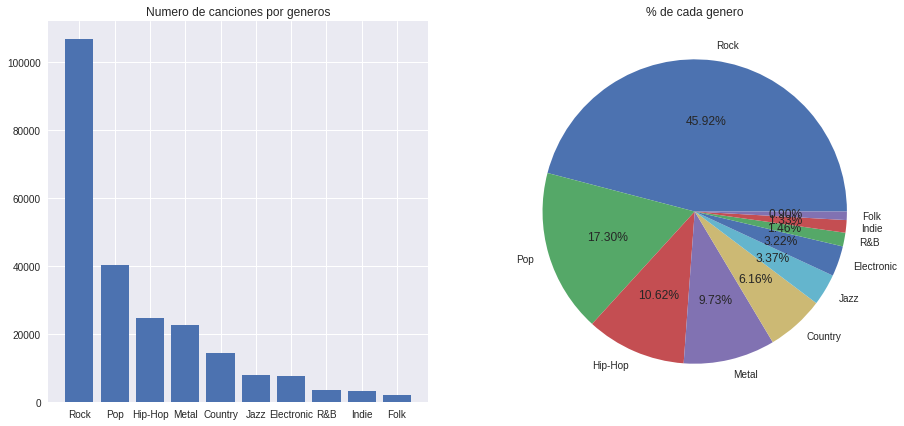

In [13]:
plot_data = data['genre'].value_counts()

plt.figure(1, figsize=(15, 7))
plt.subplot(121)
plt.title('Numero de canciones por generos')
plt.bar(np.arange(len(plot_data)), plot_data.values)
plt.xticks(np.arange(len(plot_data)), plot_data.keys().values)
plt.grid(True)

plt.subplot(122)
plt.title('% de cada genero')
plt.pie(plot_data.values, labels=plot_data.keys().values,
        autopct = '%1.2f%%')

plt.show()

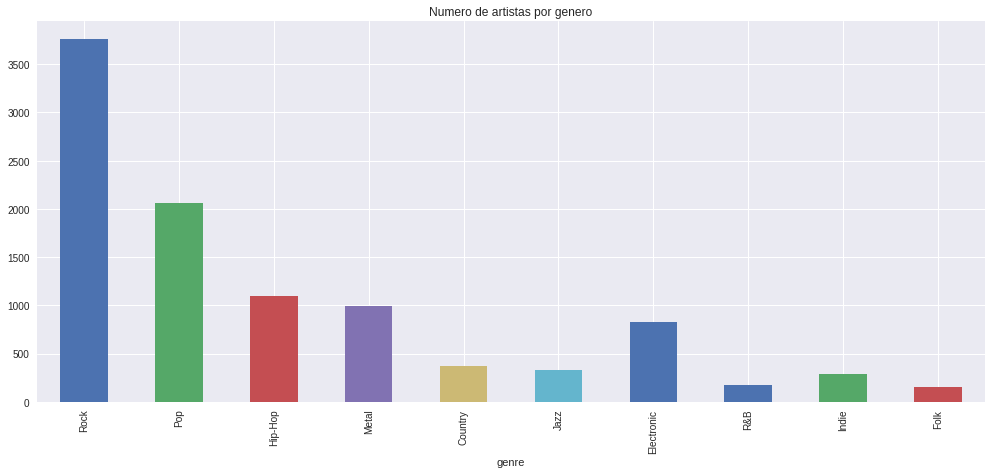

In [14]:
data.groupby(['genre'])['artist'].unique()[plot_data.keys().values].apply(len).plot('bar',title="Numero de artistas por genero",figsize=(17, 7))

###1.3.2 Artistas
Cuales son los artistas con mayor numero de canciones.

In [15]:
data['artist'].value_counts()[:20]


dolly-parton         744
elton-john           661
chris-brown          624
barbra-streisand     606
eddy-arnold          591
bee-gees             588
bob-dylan            585
eminem               573
ella-fitzgerald      571
american-idol        568
dean-martin          559
david-bowie          550
celine-dion          540
b-b-king             540
elvis-costello       518
bruce-springsteen    509
beach-boys           476
bill-anderson        465
eric-clapton         442
frank-zappa          419
Name: artist, dtype: int64

###1.3.3 Lenguaje

Como se distribuye los diferentes lenguajes en el dataset.

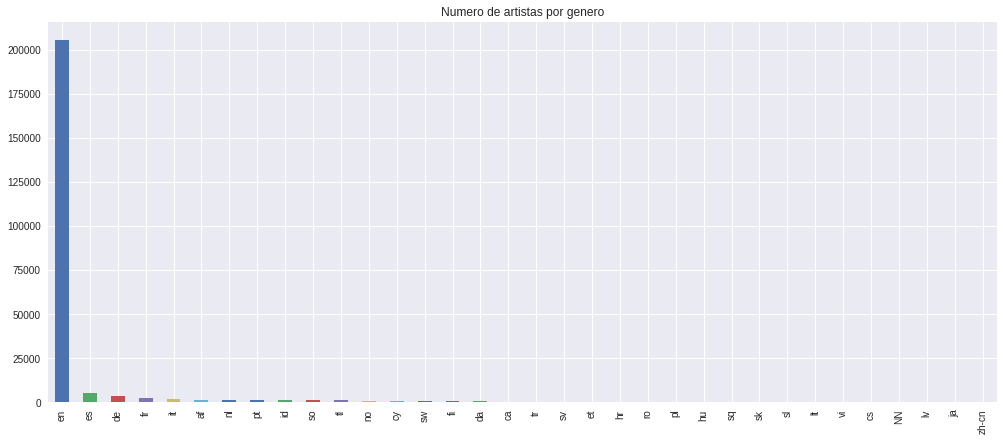

In [16]:
data['language'].value_counts().plot('bar',title="Numero de artistas por genero", figsize=(17, 7))

##1.4 Dividir los datos de train y test

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

dataEN = data[data.language == 'en']   # select only the english songs
X = dataEN.drop(columns="genre")       # leave the rest of the data (x)
y_labels = np.unique(dataEN['genre'])  # extract genre data into numpy array (y)
y_class = dataEN['genre'].apply(lambda g:np.argmax(y_labels==g))
y = to_categorical(y_class)
print(X.shape)
X.head()

Using TensorFlow backend.


(205444, 6)


,index,song,year,artist,lyrics,language
0,0,ego-remix,2009,beyonce-knowles,"Oh baby, how you doing? \n You know I'm gonna ...",en
1,1,then-tell-me,2009,beyonce-knowles,"playin' everything so easy, \n it's like you s...",en
2,2,honesty,2009,beyonce-knowles,If you search \n For tenderness \n It isn't ha...,en
3,3,you-are-my-rock,2009,beyonce-knowles,"Oh oh oh I, oh oh oh I \n \n If I wrote a boo...",en
4,4,black-culture,2009,beyonce-knowles,"Party the people, the people the party it's po...",en


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [19]:
x_train.head()

,index,song,year,artist,lyrics,language
46563,72946,life-on-the-road,2006,all,"Lyrics And Music By Bill Stevenson Crabs, Scab...",en
234429,357818,peaceful-easy-feeling,1990,the-eagles,I like the way sparkling earrings lay \n Again...,en
17645,28060,in-vain-or-true,2010,fistful-of-mercy,Just 'cuz you say don't make it true \n Just '...,en
121039,185397,please-no-more-sad-songs,2006,electric-light-orchestra,Yes she's leaving on the train \n Never coming...,en
177300,271624,until-now,2006,david-kersh,"Until this moment, love was just a word in a s...",en


In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

#2 Preprocessing 

##2.1 Word Embeddings


###2.1.1 Tokenizer

Usamos el tokenizer de keras para crear una represetacion vectorial de las letras de las canciones.

In [21]:
from keras.preprocessing.text import Tokenizer

num_words=20000
tokenizer = Tokenizer(num_words=num_words,filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(x_train.lyrics.values)

X_train = tokenizer.texts_to_sequences(x_train.lyrics.values)
X_test = tokenizer.texts_to_sequences(x_test.lyrics.values)

vocabulary_size = len(tokenizer.word_index) + 1
vocabulary_size

161764

In [22]:
print(x_train.lyrics.values[2][:170])
print(X_train[2])

Just 'cuz you say don't make it true 
 Just 'cuz it's over don't mean we're through 
 I know how I feel for you 
 Is my love for you in vain or true? 
 Is my love for you
[33, 839, 3, 71, 25, 11, 73, 7, 224, 33, 839, 7, 9, 123, 25, 11, 310, 17, 36, 99, 1, 29, 78, 1, 81, 21, 3, 20, 10, 30, 21, 3, 12, 1543, 100, 224, 20, 10, 30, 21, 3, 12, 1543, 100, 224, 23, 3, 148, 2, 1122, 677, 4, 3, 26, 6, 120, 2392, 23, 11, 7, 22, 497, 1, 113, 259, 110, 23, 11, 3, 141, 2, 578, 448, 39, 5194, 1, 29, 78, 1, 81, 21, 3, 20, 10, 30, 21, 3, 12, 1543, 100, 224, 20, 10, 30, 21, 3, 12, 1543, 100, 224]


####2.1.1.1 Estadisticas con el tokenizer

In [23]:
lyrics_size_words = list(map(len, X_train))
print("Cantidad de palabras promedio: ", sum(lyrics_size_words)/len(lyrics_size_words))
print("Cantidad maxima de palabras: ", max(lyrics_size_words))
print("Cantidad minima de palabras: ", min(lyrics_size_words))

Cantidad de palabras promedio:  238.47573882205688
Cantidad maxima de palabras:  6057
Cantidad minima de palabras:  0


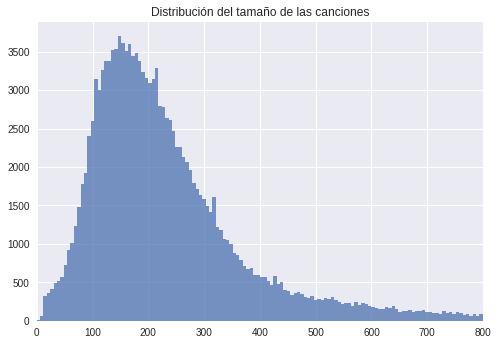

In [24]:
plt.hist(lyrics_size_words, 1000, alpha=0.75)
plt.title('Distribución del tamaño de las canciones')
plt.xlim(0, 800)
plt.show()

####2.1.1.2 Estandarizar el numero de palabrar por cancion.

Por facilidad dejaremos todas las letras de las canciones con el mismo numero de palabras. Como el promedio de palabras por cancion es 229 dejaremos el tamaño de 250

In [25]:
from keras.preprocessing.sequence import pad_sequences

maxlen=300

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(x_train.lyrics.values[2][:])
print(X_train[2])

Just 'cuz you say don't make it true 
 Just 'cuz it's over don't mean we're through 
 I know how I feel for you 
 Is my love for you in vain or true? 
 Is my love for you in vain or true? 
 Can you hear the voices singing to you? 
 With a little patience can't it be cool? 
 I still remember why can't you? 
 Into the darkness born now anew 
 I know how I feel for you 
 Is my love for you in vain or true? 
 Is my love for you in vain or true?
[  33  839    3   71   25   11   73    7  224   33  839    7    9  123
   25   11  310   17   36   99    1   29   78    1   81   21    3   20
   10   30   21    3   12 1543  100  224   20   10   30   21    3   12
 1543  100  224   23    3  148    2 1122  677    4    3   26    6  120
 2392   23   11    7   22  497    1  113  259  110   23   11    3  141
    2  578  448   39 5194    1   29   78    1   81   21    3   20   10
   30   21    3   12 1543  100  224   20   10   30   21    3   12 1543
  100  224    0    0    0    0    0    0    0    0    0   

###2.1.2 Embedding Layer

Con las palabras tokenizadas procedemos a hacer el word embeddings. Para esto usaremos una capa que nos proporciona Keras.

####2.1.1.1 GloVe
Para tener una mejor Word Embedding decidimos usar word embedding precalculado para iniciar. 

In [26]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2019-02-27 15:50:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-02-27 15:50:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  3.02MB/s    in 5m 13s  

2019-02-27 15:55:47 (2.63 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
embedding_dim = 100
embedding_matrix = np.zeros((vocabulary_size, embedding_dim))

with open('/content/glove.6B.100d.txt') as f:
  for line in f:
    word, *vector = line.split()
    if word in tokenizer.word_index:
      idx = tokenizer.word_index[word]
      embedding_matrix[idx] = np.array(vector, dtype=np.float32)

In [28]:
tmp = np.where(np.count_nonzero(embedding_matrix, axis=1)==0 )[0][1:]-1
print("Numero de palabras no encontradas en GloVe:",len(tmp))
print("Primeras 100 palabras no encontradas:", np.array(list(tokenizer.word_index.keys()))[tmp[:100]])

Numero de palabras no encontradas en GloVe: 82472
Primeras 100 palabras no encontradas: ['motherfuckin' 'motherfucking' 'knowin' 'hadn' 'muthafuckin' 'youve'
 'wonderin' 'showin' 'countin' 'muthafucka' 'finna' 'lettin' 'prayin'
 'listenin' 'starin' 'grindin' 'aight' 'dibby' 'touchin' 'aiyyo' 'thuggin'
 'suckin' 'breathin' 'whippin' 'speakin' 'catchin' 'shits' 'gunna' 'gyal'
 'wantin' 'ringin' 'stuntin' 'shittin' 'hearin' 'flowin' 'buyin' 'whoah'
 'titties' 'floatin' 'mothafuckin' 'reppin' 'winnin' 'pourin' 'illest'
 'drippin' 'bwoy' 'hidin' 'stressin' 'â¦' 'evenin' 'ã¢' 'crawlin'
 'spendin' 'blastin' 'muthafuckas' 'suckas' 'stackin' 'whatchu' 'slangin'
 'bleedin' 'killas' 'mothafucka' 'rubbin' 'buildin' 'bouncin' 'rybody'
 'tickin' 'flashin' 'fillin' 'oohh' 'sendin' 'turnt' 'prolly' 'trynna'
 'representin' 'wildin' 'climbin' 'needin' 'duckin' 'everythin' 'hummin'
 'tatted' 'grippin' 'claimin' 'realer' 'trigga' 'dissin' 'flexin'
 'rything' 'ohhhhh' 'peepin' 'wooh' 'motherfuck' 'lames' '

In [29]:
print("% de parabras encontradas en el vocabulario:",100*np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1)) / vocabulary_size)
print("% de parabras encontradas en el numero de palabras usadas:",100*np.count_nonzero(np.count_nonzero(embedding_matrix[:num_words], axis=1)) / num_words)

% de parabras encontradas en el vocabulario: 49.01646843549863
% de parabras encontradas en el numero de palabras usadas: 95.485


#3 Convolutional Neural Network (CNN)

Nuestro primer intento para clasificar es una CNN. Este tipo de redes se ha destacado por su gran rendimiento en el analisis de imagenes, tambien ha mostrado un gran potencial para la clasificacion de texto [(Yoom Kim.,2014) ](http://emnlp2014.org/papers/pdf/EMNLP2014181.pdf).

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Dense, Flatten

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

##3.1 Arquitectura
Dado nuestra perspicacia y experiencia en redes neuronales decidimos tomar inspiracion de varios tutoriales de internet. Esta arquitectura en particular la encontramos [aqui](http://fnl.es/a-sober-perspective-on-deep-learning.html).


In [31]:
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, weights=[embedding_matrix], 
                           input_length=maxlen, trainable=True))
model.add(Conv1D(embedding_dim, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          16176400  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 296, 100)          50100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 59, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 55, 100)           50100     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 11, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)    

###3.1.1 Analisis de los resutados
Con la grafica de perdida podemos notar que el modelo sugre de overfitting haciendo que el modelo no generalice bien para los datos de prueba.

Instructions for updating:
Use tf.cast instead.
Train on 143810 samples, validate on 61634 samples
Epoch 1/15
143810/143810 [==============================] - 117s 815us/step - loss: 1.3567 - acc: 0.5603 - val_loss: 1.3157 - val_acc: 0.5657
Epoch 2/15
143810/143810 [==============================] - 113s 787us/step - loss: 1.2803 - acc: 0.5848 - val_loss: 1.5154 - val_acc: 0.4888
Epoch 3/15
143810/143810 [==============================] - 113s 785us/step - loss: 1.2693 - acc: 0.5919 - val_loss: 1.4299 - val_acc: 0.5486
Epoch 4/15
143810/143810 [==============================] - 113s 785us/step - loss: 1.2635 - acc: 0.5962 - val_loss: 1.3319 - val_acc: 0.5551
Epoch 5/15
143810/143810 [==============================] - 113s 782us/step - loss: 1.2591 - acc: 0.6003 - val_loss: 1.3429 - val_acc: 0.5703
Epoch 6/15
143810/143810 [==============================] - 112s 780us/step - loss: 1.2617 - acc: 0.6026 - val_loss: 1.4688 - val_acc: 0.5767
Epoch 7/15
143810/143810 [=======================

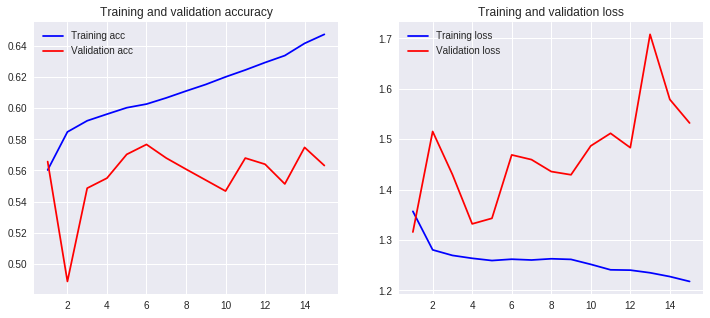

In [32]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

###3.1.2 Overfitting


####3.1.2.1 Dropout Layers
Para disminuir el overfitting por lo general se usa capas de Dropout. Vamos a poner una capa de Dropout por cada capa de convolución. Tambien se campio el optimizador de *rmsprop* a *adam* ya que encontramos que funciona mejor en la mayoria de casos.

In [0]:
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, weights=[embedding_matrix], 
                           input_length=maxlen, trainable=True))
model.add(Conv1D(embedding_dim, 5, activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 300, 100)          16176400  
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 296, 100)          50100     
_________________________________________________________________
dropout_19 (Dropout)         (None, 296, 100)          0         
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 59, 100)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 55, 100)           50100     
_________________________________________________________________
dropout_20 (Dropout)         (None, 55, 100)           0         
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 11, 100)           0         
__________

Aunque mejoro un poco el *Accuracy*  y el *loss* del grupo de prueba ayudando a disminuir el overfitting, se sigue teniendo demasiado overfitting.

#### 3.1.2.2 Weight Decay
Otro famoso metodo para disminuir el overfitting es el *Weight Decay* que implica penalizar los pesos despues de cada actualización con un numero menor y muy cercano a 1. En la literatura por lo general se escoge un *Weight Decay* de 0.0005 o cercano a este.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 300, 100)          16176400  
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 296, 100)          50100     
_________________________________________________________________
dropout_16 (Dropout)         (None, 296, 100)          0         
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 59, 100)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 55, 100)           50100     
_________________________________________________________________
dropout_17 (Dropout)         (None, 55, 100)           0         
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 11, 100)           0         
__________

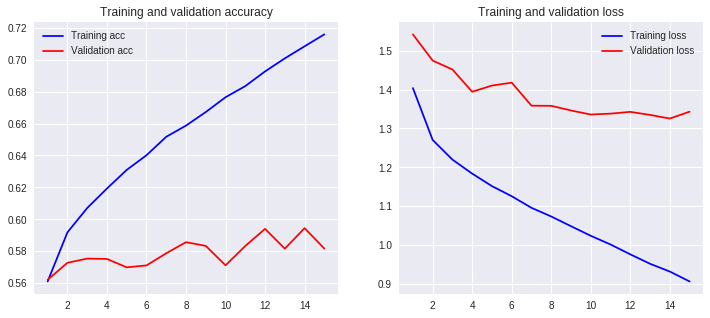

In [41]:
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, weights=[embedding_matrix], 
                           input_length=maxlen, trainable=True))
model.add(Conv1D(embedding_dim, 5, kernel_regularizer=l2(0.00025), activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, kernel_regularizer=l2(0.00025), activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, kernel_regularizer=l2(0.00025), activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Aunque evito que la red memorizara muy rapido el conjuto de entrenamiento, se sigue presentando el overfitting.

#### 3.1.2.3 Arquitectura
Auque se presenten mejoras con los 2 metodos anteriores, estas son poco significativas y dejandonos pocas opciones para poder ajustar el overfitting.

El overfitting se puede presentar por la propia arquitectura de la red, puede que la red sea muy grande para el problema y los datos, con esto en mente se eliminara una capa de convolución.

In [39]:
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, weights=[embedding_matrix], 
                           input_length=maxlen, trainable=True))
model.add(Conv1D(embedding_dim, 5, kernel_regularizer=l2(0.00025), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, kernel_regularizer=l2(0.00025), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(11))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 300, 100)          16176400  
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 296, 100)          50100     
_________________________________________________________________
dropout_14 (Dropout)         (None, 296, 100)          0         
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 59, 100)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 55, 100)           50100     
_________________________________________________________________
dropout_15 (Dropout)         (None, 55, 100)           0         
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 5, 100)            0         
__________

Train on 143810 samples, validate on 61634 samples
Epoch 1/15
143810/143810 [==============================] - 136s 947us/step - loss: 1.3962 - acc: 0.5600 - val_loss: 1.5649 - val_acc: 0.5833
Epoch 2/15
143810/143810 [==============================] - 135s 939us/step - loss: 1.2663 - acc: 0.5917 - val_loss: 1.4675 - val_acc: 0.5892
Epoch 3/15
143810/143810 [==============================] - 137s 949us/step - loss: 1.2148 - acc: 0.6066 - val_loss: 1.4539 - val_acc: 0.5940
Epoch 4/15
143810/143810 [==============================] - 138s 960us/step - loss: 1.1812 - acc: 0.6178 - val_loss: 1.4235 - val_acc: 0.5973
Epoch 5/15
143810/143810 [==============================] - 136s 948us/step - loss: 1.1483 - acc: 0.6285 - val_loss: 1.4012 - val_acc: 0.5981
Epoch 6/15
143810/143810 [==============================] - 134s 930us/step - loss: 1.1241 - acc: 0.6367 - val_loss: 1.3933 - val_acc: 0.5955
Epoch 7/15
143810/143810 [==============================] - 133s 927us/step - loss: 1.0988 - acc:

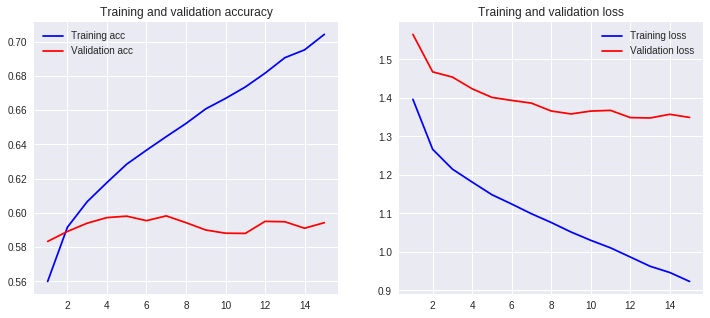

In [40]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

#### 3.1.2.4 Datos
Por como estan distribuidos los generos en el dataset puede que este contribuyendo al overfitting. Como experimento se removeran las canciones de rock que son el 46% de las canciones.




In [0]:
dataEN2 = dataEN[data.genre != "Rock"]
X2 = dataEN2.drop(columns="genre")       # leave the rest of the data (x)
y_labels2 = np.unique(dataEN['genre'])             # extract genre data into numpy array (y)
y_class2 = dataEN['genre'].apply(lambda g:np.argmax(y_labels==g))
y2 = to_categorical(y_class)
print(X2.shape)
print(X2.head())

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

num_words=20000
tokenizer2 = Tokenizer(num_words=num_words,filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer2.fit_on_texts(x_train2.lyrics.values)

X_train2 = tokenizer.texts_to_sequences(x_train2.lyrics.values)
X_test2 = tokenizer.texts_to_sequences(x_test2.lyrics.values)

vocabulary_size2 = len(tokenizer2.word_index) + 1


#Quitar rock

data[data.genre != "Rock"]

In [0]:
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, weights=[embedding_matrix], 
                           input_length=maxlen, trainable=True))
model.add(Conv1D(embedding_dim, 5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, activation='relu'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(55))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, weights=[embedding_matrix], 
                           input_length=maxlen, trainable=True))
model.add(Conv1D(embedding_dim, 5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, activation='relu'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(55))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=15,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, weights=[embedding_matrix], 
                           input_length=maxlen, trainable=True))
model.add(Conv1D(embedding_dim, 5,  kernel_regularizer=l2(0.005), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, kernel_regularizer=l2(0.005), activation='relu'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(55))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=13,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, weights=[embedding_matrix], 
                           input_length=maxlen, trainable=True))
model.add(Conv1D(embedding_dim, 5,  kernel_regularizer=l2(0.005), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(5))
model.add(Conv1D(embedding_dim, 5, kernel_regularizer=l2(0.005), activation='relu'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(55))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=13,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, weights=[embedding_matrix], 
                           input_length=maxlen, trainable=True))
model.add(Conv1D(embedding_dim, 10,  kernel_regularizer=l2(0.005), activation='relu'))
model.add(Dropout(0.55))
model.add(MaxPooling1D(15))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=13,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, weights=[embedding_matrix], 
                           input_length=maxlen, trainable=True))
model.add(Conv1D(embedding_dim, 10,  kernel_regularizer=l2(0.005), activation='relu'))
model.add(Dropout(0.55))
model.add(MaxPooling1D(15))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=13,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)